In [1]:
library(dplyr)
library(tidyverse)
library(VIM)
library(faraway)
library(ggplot2)
library(naniar)
library(GGally)
library(caret)
library(fastDummies)
library(leaps)
library(recipes)
library(rstan)
library(tree)
library(bayesplot)
library(mvtnorm)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     

## Background
403 African Americans were interviewed in a study to understand the prevalence of obesity, diabetes, and other cardiovascular risk factors in central Virginia. Glycosolated hemoglobin (glyhb) greater than 7.0 is usually taken as a positive diagnosis of diabetes. We are interested in identifying the most important predicotrs that contribute to a high glyhb level in african american patience while also creating a predictive model that accurately identifies patience with diabetes. 


### Questions to answer:
- How much ades Age, Sex, and Location impact the glyhb levels in patients
- Are there any interaction effects between waist, height, and hip that could explain glyhb levels.

In [2]:
head(diabetes)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NA,NA,29,38,720
2,1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NA,NA,46,48,360
3,1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
4,1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NA,NA,33,38,480
5,1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NA,NA,44,41,300
6,1008,248,94,69,3.6,4.81,Buckingham,34,male,71,190,large,132,86,NA,NA,36,42,195


In [3]:
summary(diabetes)

       id             chol          stab.glu          hdl        
 Min.   : 1000   Min.   : 78.0   Min.   : 48.0   Min.   : 12.00  
 1st Qu.: 4792   1st Qu.:179.0   1st Qu.: 81.0   1st Qu.: 38.00  
 Median :15766   Median :204.0   Median : 89.0   Median : 46.00  
 Mean   :15978   Mean   :207.8   Mean   :106.7   Mean   : 50.45  
 3rd Qu.:20336   3rd Qu.:230.0   3rd Qu.:106.0   3rd Qu.: 59.00  
 Max.   :41756   Max.   :443.0   Max.   :385.0   Max.   :120.00  
                 NA's   :1                       NA's   :1       
     ratio            glyhb             location        age           gender   
 Min.   : 1.500   Min.   : 2.68   Buckingham:200   Min.   :19.00   male  :169  
 1st Qu.: 3.200   1st Qu.: 4.38   Louisa    :203   1st Qu.:34.00   female:234  
 Median : 4.200   Median : 4.84                    Median :45.00               
 Mean   : 4.522   Mean   : 5.59                    Mean   :46.85               
 3rd Qu.: 5.400   3rd Qu.: 5.60                    3rd Qu.:60.00        

In [4]:
table(diabetes$diabetesT)

< table of extent 0 >

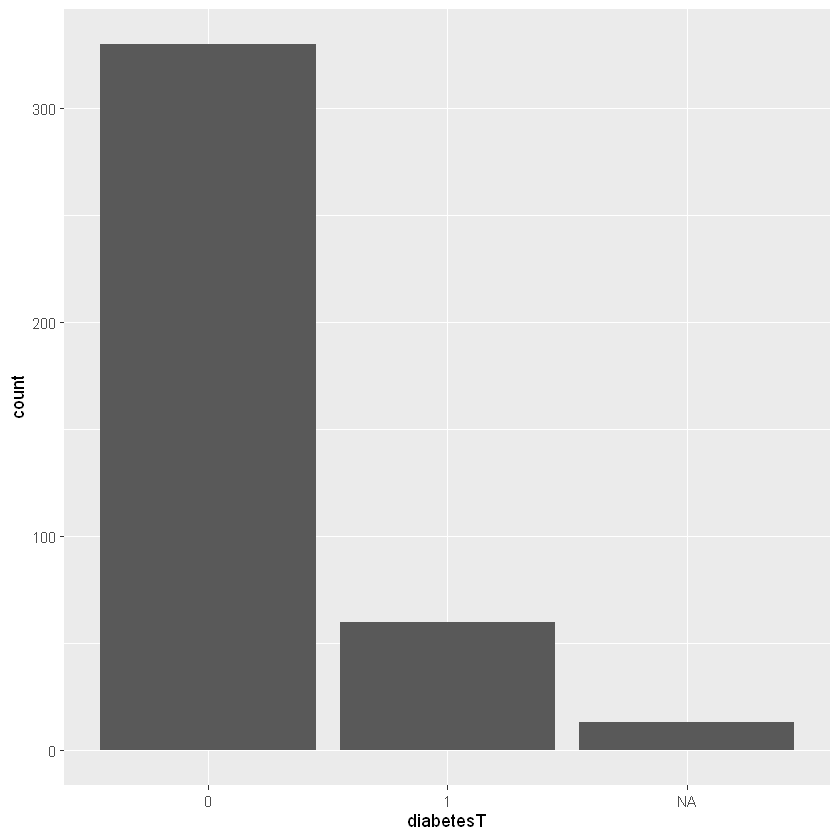

In [5]:
diabetes$diabetesT <- as.factor(ifelse(diabetes$glyhb >= 7, 1, 0))
ggplot(data = diabetes, mapping = aes(x= diabetesT)) + 
geom_bar()


In [6]:
stab.gender.gplot <- ggplot(data= diabetes, mapping = aes(x=gender, y= stab.glu)) + geom_boxplot() + facet_wrap(~location) + labs(
    x = "Gender",
    y = "Stable Glucose Level",
    title = "Glucose Level by Gender and Location"
    
)
ggsave("StabGlucoseLevelGenderLocation.png", plot = stab.gender.gplot, width = 8, height = 6)

Don't know how to automatically pick scale for object of type <labelled>. Defaulting to continuous.


In [7]:
plot <- ggplot(data = diabetes, mapping = aes(x = gender, y = glyhb)) +
  geom_boxplot() +
  facet_wrap(~location) +
  labs(
    x = "Gender",
    y = "GLYHB Level",
    title = "GLYHB Level by Gender and Location"
  )

ggsave("GLYHBLevelGenderLocation.png", plot = plot, width = 8, height = 6)


Don't know how to automatically pick scale for object of type <labelled>. Defaulting to continuous.
Warning message:
"Removed 13 rows containing non-finite outside the scale range (`stat_boxplot()`)."


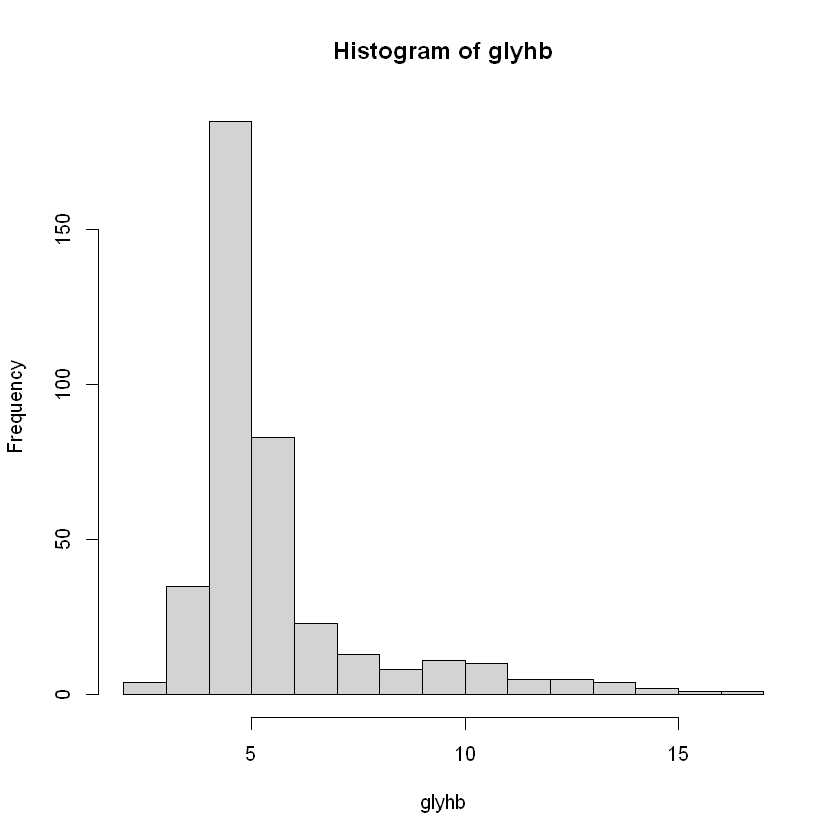

In [8]:
hist(diabetes$glyhb, main="Histogram of glyhb", xlab="glyhb") 

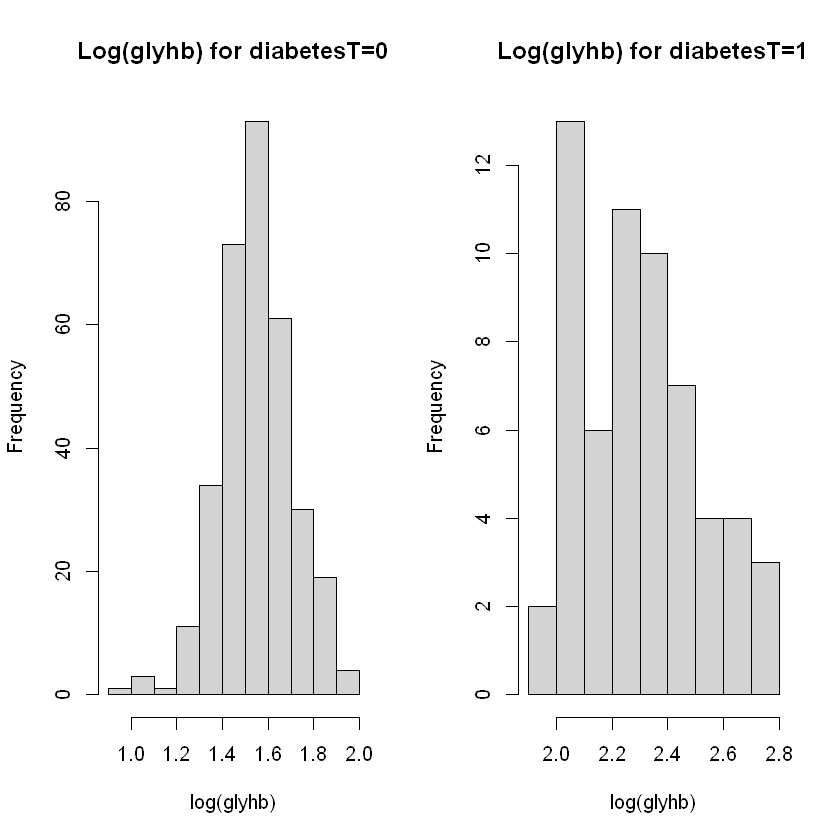

In [9]:
par(mfrow=c(1,2)) 
split_data <- split(log(diabetes$glyhb), diabetes$diabetesT)
hist(split_data[[1]], main="Log(glyhb) for diabetesT=0", xlab="log(glyhb)")
hist(split_data[[2]], main="Log(glyhb) for diabetesT=1", xlab="log(glyhb)")

In [ ]:
ggplot(data = diabetes, mapping = aes(x=stab.glu, y=glyhb, alpha = 0.5)) + geom_point(aes(size = age, color = gender))

In [ ]:
glyhb.stab.scatter <- ggplot(data = diabetes, mapping = aes(x= age, y = log(glyhb))) + geom_point(aes(size = as.numeric(ratio), colour = as.numeric(stab.glu),alpha = 0.5)) + scale_colour_binned() +
facet_wrap(~gender) + labs(x="Age", y="GLYHB", title = "GLYHB age comparison", caption = "Those who are older, tend to have a higher glyhb level with a combination of stab glucose and high ratio") 

ggsave("GLYHBLevelGenderAgeStabGlu.png", plot = glyhb.stab.scatter, width = 8, height = 6)

In [ ]:
scatter.glyhb <- ggplot(data = diabetes, mapping = aes(x=waist, y=glyhb, size = as.numeric(stab.glu), colour = location, alpha = 0.5)) + geom_point() + facet_wrap(~gender)
ggsave("GLYHBLevelGenderLocationScatter.png", plot = scatter.glyhb, width = 8, height = 6)

## Correlation Analysis

In [ ]:
diabetes_clean <- diabetes %>% 
  dplyr::select(-c(id, location, gender, frame, diabetesT)) %>% 
  filter(complete.cases(.))

cor_matrix <- cor(diabetes_clean)
diag(cor_matrix) <- 0 
cor_data <- as.data.frame(as.table(cor_matrix))

ggplot(cor_data, aes(Var1, Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  coord_fixed()

In [11]:
diabetes_clean_T <- diabetes %>% 
  filter(diabetesT == 1) %>%
  dplyr::select(-c(id, location, gender, frame, diabetesT)) %>% 
  filter(complete.cases(.))

cor_matrix_T <- cor(diabetes_clean_T)
diag(cor_matrix_T) <- 0 
cor_data_T <- as.data.frame(as.table(cor_matrix_T))

diabetes_clean_F <- diabetes %>% 
  filter(diabetesT == 0) %>%
  dplyr::select(-c(id, location, gender, frame, diabetesT)) %>% 
  filter(complete.cases(.))

cor_matrix_F <- cor(diabetes_clean_F)
diag(cor_matrix_F) <- 0 
cor_data_F <- as.data.frame(as.table(cor_matrix_F))

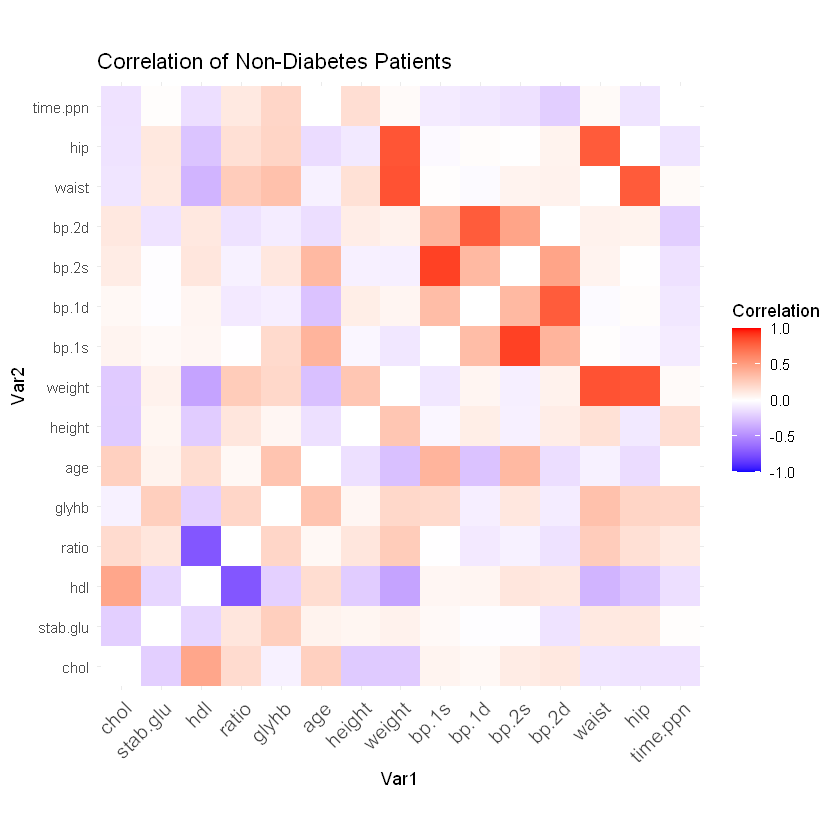

In [13]:
ggplot(cor_data_F, aes(Var1, Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  coord_fixed() +
  ggtitle("Correlation of Non-Diabetes Patients")

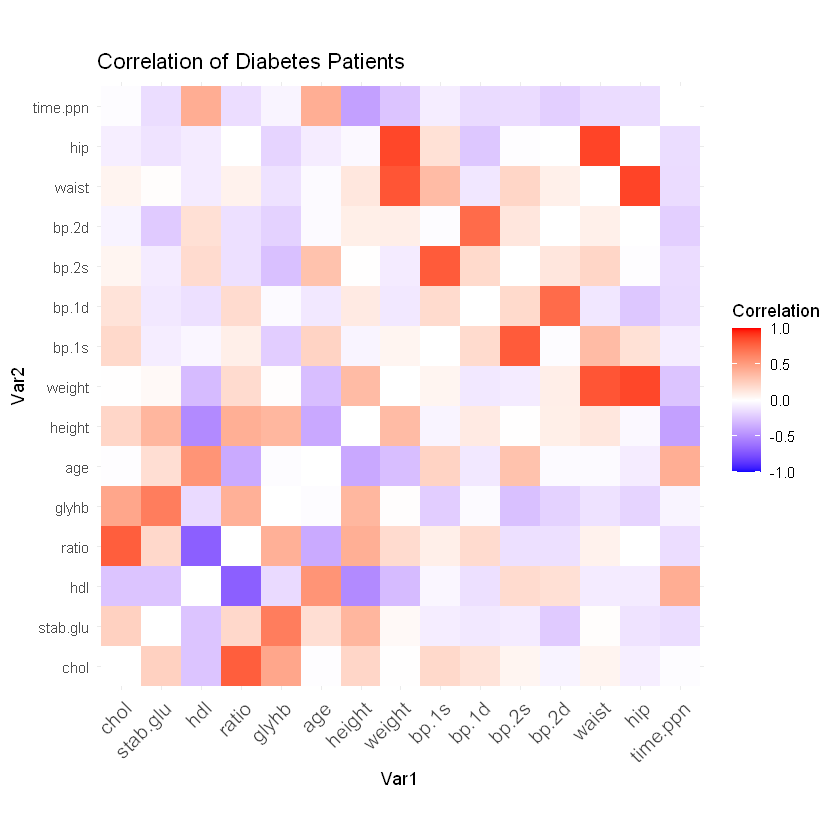

In [72]:
par(mfrow=c(1,2))

ggplot(cor_data_T, aes(Var1, Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  coord_fixed() +
  ggtitle("Correlation of Diabetes Patients")

## Pre-Process

In [74]:
diabetes %>% summarise(across(everything(),~sum(is.na(.)))) %>% select(where(~ . > 0))

chol,hdl,ratio,glyhb,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,diabetesT
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,13,5,1,12,5,5,262,262,2,2,3,13


In [76]:
diabetes.drop <- diabetes %>% filter(!is.na(glyhb)) %>% dplyr::select(-c(diabetesT, id))

In [78]:
X <- subset(diabetes.drop, select = -c(glyhb)) #%>% dummy_columns(remove_first_dummy = T, remove_selected_columns = T, ignore_na = T)
y <- log(diabetes.drop$glyhb)

In [80]:
recipe <- recipe(~ ., data = X) %>%
  step_impute_knn(all_predictors()) %>% 
  step_normalize(all_numeric_predictors())  %>%
  step_dummy(all_factor_predictors())

In [82]:
prepared_recipe <- prep(recipe)
diabetes.clean <- bake(prepared_recipe, new_data = NULL)


chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,location_Louisa,gender_female,frame_medium,frame_large
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.09393653,-0.4709910,0.3301899,-0.5307872,-0.04711384,-1.0108656,-1.3939480,-0.8298859,-1.7896547,-0.461453967,-1.94732913,-1.5476112,-0.8932065,1.24223986,0,1,1,0
-0.94435765,-0.1921712,-1.5210095,1.3679372,-1.08143433,-0.4995328,1.0071563,-1.0916725,-1.1254178,0.602259647,-0.55173241,1.4076487,0.8813760,0.07438816,0,1,0,1
0.46555105,-0.2851111,-0.7689597,0.9651774,0.68299474,-1.2665320,1.9477951,2.3115533,0.6458805,2.463758472,0.08262974,1.9291652,2.4785002,-0.50953769,0,1,0,1
-2.89137443,-0.2665231,-2.2152092,1.1377888,1.23057617,0.2674664,-1.4434553,-1.1789347,-2.4538916,-0.394971866,-0.55173241,-0.8522560,-0.8932065,0.46367206,0,0,0,1
0.93552062,-0.3222871,-1.2896095,2.5186790,1.04804903,0.5231328,0.1407785,0.0427361,-0.2397687,0.003920739,-0.67860484,1.0599711,-0.3608318,-0.12025379,0,0,1,0
0.91314111,-0.2479351,1.0822396,-0.5307872,-0.77722242,1.2901320,0.3140540,-0.2190505,0.2030559,-0.062561362,0.59011945,-0.3307395,-0.1833735,-0.46087720,0,0,0,1


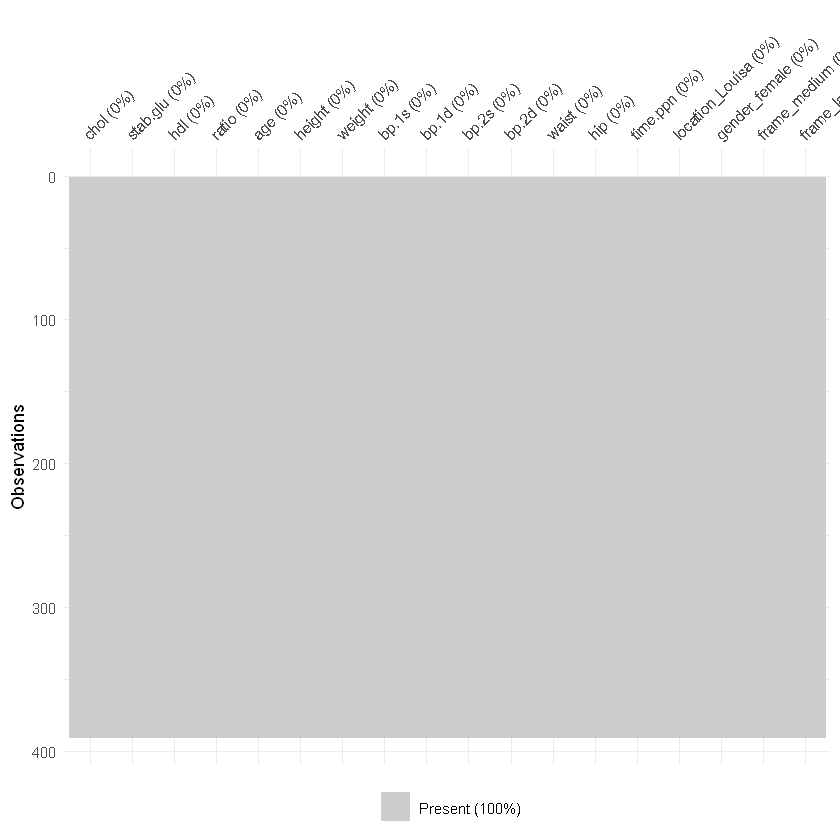

In [84]:
vis_miss(diabetes.clean)
head(diabetes.clean)

## Regression  Model

In [86]:
set.seed(42)
train.indx <- createDataPartition(y = y, p = .8, list = FALSE)

In [88]:
X.train <-diabetes.clean[train.indx,]
X.test <- diabetes.clean[-train.indx,]

y.train <- y[train.indx] 
y.test <- y[-train.indx]

Xy.train <- cbind(X.train, y.train)
Xy.test <- cbind(X.test, y.test)

In [90]:
linear.model <- lm(y.train~., data = Xy.train)

In [92]:
summary(linear.model)


Call:
lm(formula = y.train ~ ., data = Xy.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97546 -0.11057 -0.01297  0.09238  1.09415 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.673031   0.041192  40.615  < 2e-16 ***
chol             0.026803   0.024202   1.107  0.26901    
stab.glu         0.183876   0.012791  14.375  < 2e-16 ***
hdl             -0.012740   0.028818  -0.442  0.65874    
ratio            0.024920   0.031281   0.797  0.42630    
age              0.046956   0.016206   2.897  0.00404 ** 
height           0.008444   0.018853   0.448  0.65455    
weight          -0.015083   0.034026  -0.443  0.65789    
bp.1s            0.030048   0.021901   1.372  0.17110    
bp.1d           -0.012613   0.018409  -0.685  0.49380    
bp.2s           -0.020267   0.018517  -1.094  0.27463    
bp.2d           -0.002212   0.016607  -0.133  0.89414    
waist            0.029922   0.027851   1.074  0.28354    
hip              0.

In [94]:
y.hat.lin <- predict(linear.model, X.test)
exp(sqrt(mean((y.hat.lin-y.test)^2)))

[1] 1.229137

In [96]:
linear.model.interactions <- lm(y.train~stab.glu + age + time.ppn + bp.1d*chol+ gender_female, data = Xy.train)

In [98]:
interactions <- model.matrix(~(.)^2-1, data = X.train)

In [100]:
subset.model <- summary(regsubsets(x = interactions, y= y.train, method = "backward"))

Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
"1  linear dependencies found"


In [102]:
c(selected.variables,"stab.glu", "gender_female", "location_Louisa", "waist", "bp.1s", "frame_medium")

ERROR: Error: object 'selected.variables' not found


In [104]:
dim(interactions)

[1] 314 171

In [106]:
best.model.index <- which.max(subset.model$adjr2)



best.model.variables <- colnames(interactions)[subset.model$which[best.model.index,]]


print(best.model.variables)

selected.variables <- best.model.variables

X.train.selected <- interactions[, c(selected.variables), drop = FALSE]#,"stab.glu", "gender_female", "location_Louisa", "waist", "bp.1s", "frame_medium"), drop = FALSE]

final.model <- lm(y.train ~ . ,data = as.data.frame(X.train.selected))

summary(final.model)

[1] "chol"                     "height"                  
[3] "stab.glu:bp.1s"           "stab.glu:waist"          
[5] "stab.glu:time.ppn"        "stab.glu:location_Louisa"
[7] "stab.glu:gender_female"   "stab.glu:frame_medium"   
[9] "hip:location_Louisa"     



Call:
lm(formula = y.train ~ ., data = as.data.frame(X.train.selected))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87278 -0.12752 -0.02231  0.10983  1.13901 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.663078   0.013693 121.451  < 2e-16 ***
chol                        0.042594   0.013349   3.191  0.00157 ** 
height                     -0.007126   0.013529  -0.527  0.59876    
`stab.glu:bp.1s`           -0.007466   0.017405  -0.429  0.66828    
`stab.glu:waist`            0.034841   0.014772   2.359  0.01897 *  
`stab.glu:time.ppn`         0.050588   0.015444   3.275  0.00118 ** 
`stab.glu:location_Louisa`  0.125959   0.019520   6.453 4.32e-10 ***
`stab.glu:gender_female`    0.151560   0.024233   6.254 1.35e-09 ***
`stab.glu:frame_medium`     0.092543   0.025591   3.616  0.00035 ***
`hip:location_Louisa`       0.014075   0.019852   0.709  0.47888    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

Gender and Stable Glucose: Females with higher stable glucose levels have significantly higher glyhb levels compared to males, suggesting a stronger relationship between stable glucose and glyhb for females.


Location (Louisa): People in Louisa generally have lower glyhb levels, regardless of stable glucose levels.

Stable Glucose (Overall): Stable glucose is a strong predictor of glyhb levels, significantly increasing glyhb irrespective of gender or location.

Chol: Higher Higher glucose levels overall effect the glyhb levels by 1.03 units when all other vraibales are kept constant.

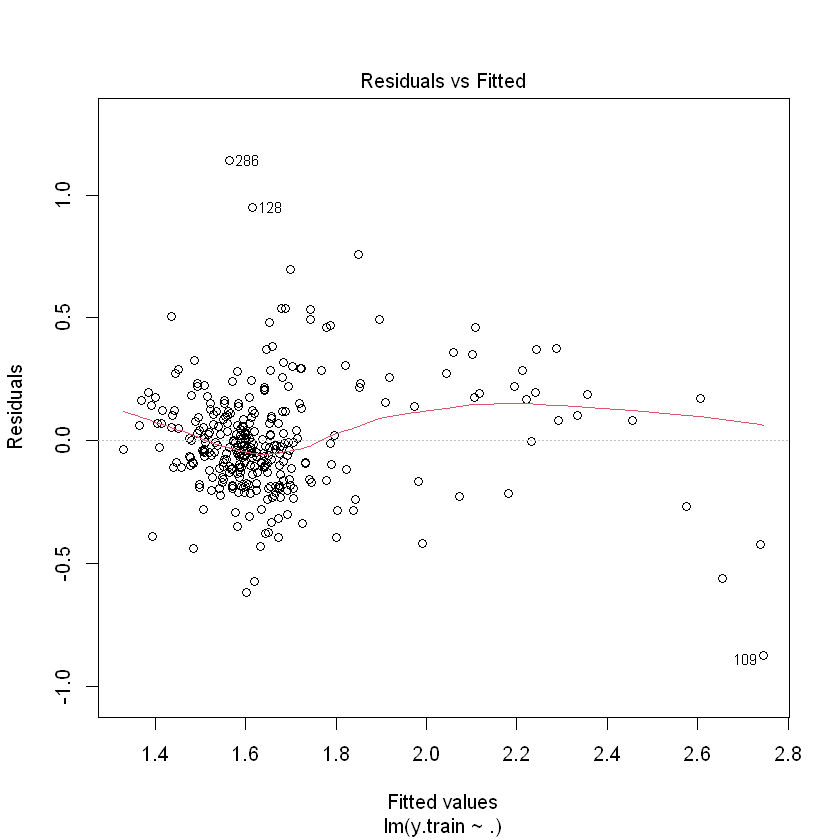

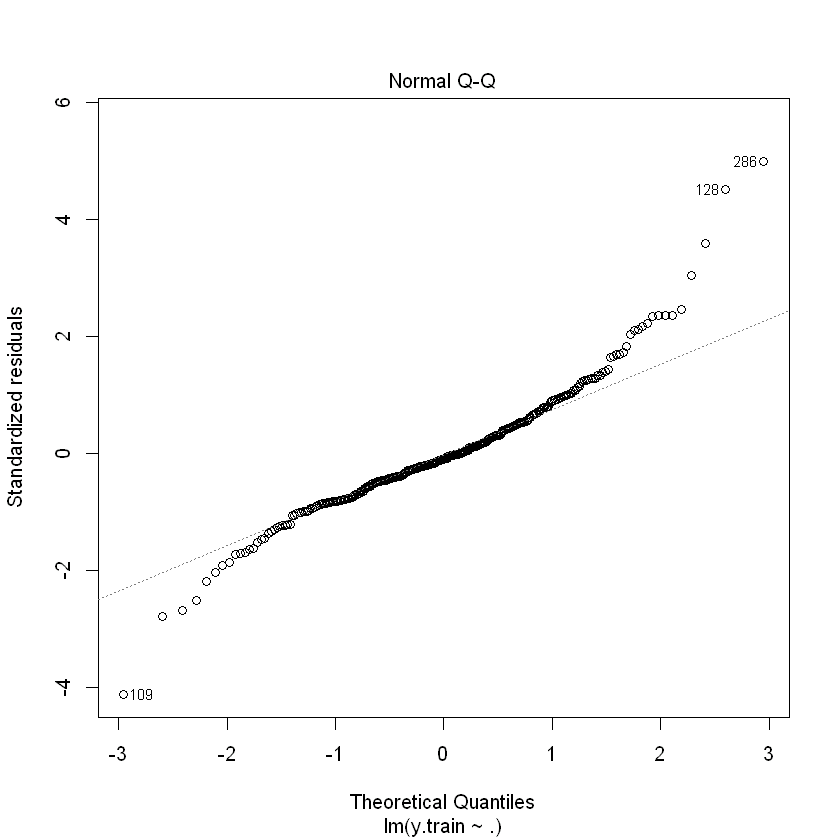

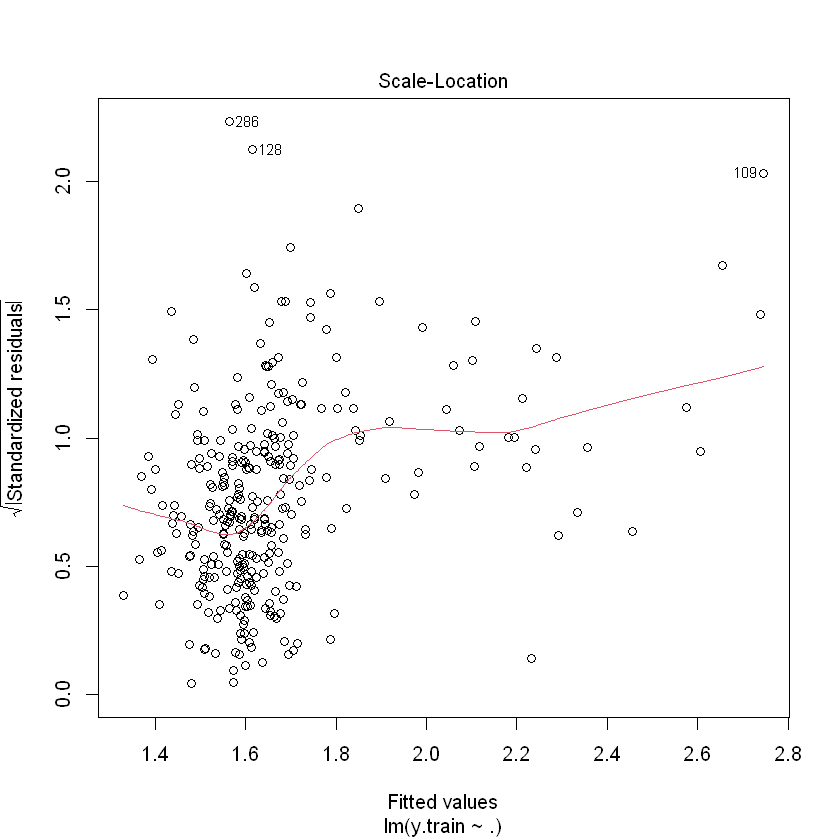

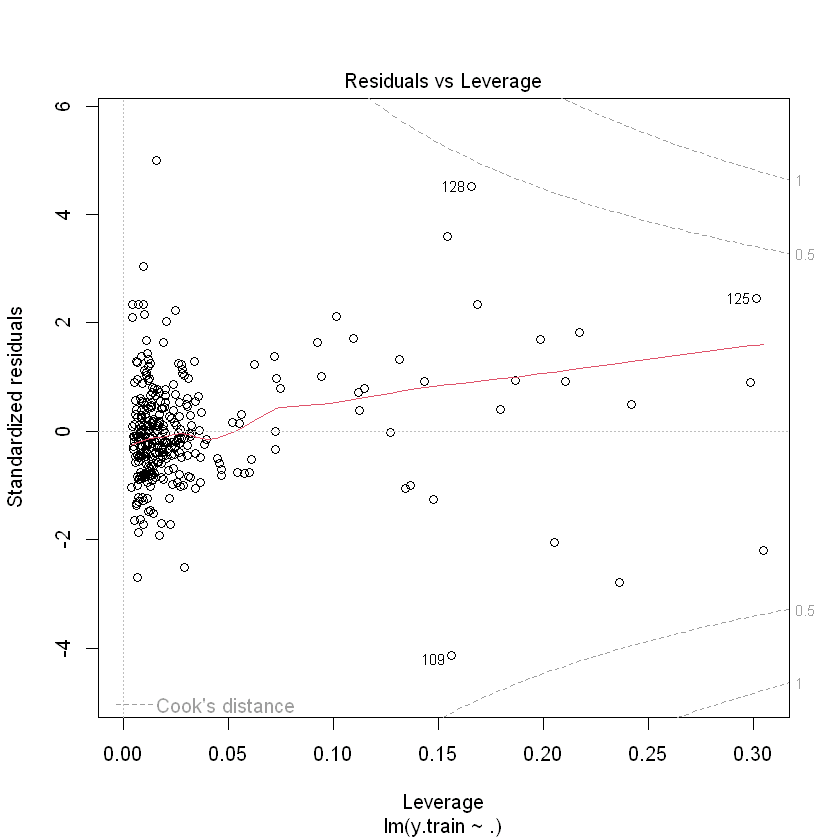

In [109]:
plot(final.model)

In [111]:
interactions.test <- model.matrix(~(.)^2-1, data = X.test)

X.test.selected <- as.data.frame(interactions.test[, c(selected.variables,"stab.glu", "gender_female", "location_Louisa", "waist", "bp.1s", "frame_medium"), drop = FALSE])

In [113]:
y.hat <- predict(final.model, X.test.selected)
exp(sqrt(mean((y.hat - y.test)^2)))

[1] 1.281487

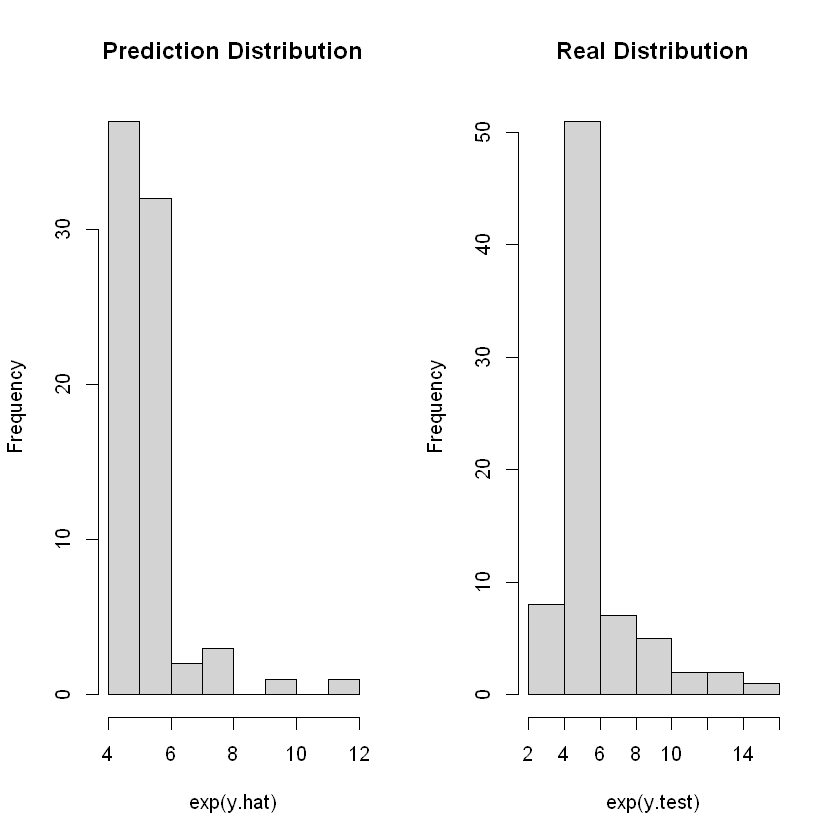

In [115]:
par(mfrow=c(1,2))
hist(exp(y.hat), main = "Prediction Distribution")
hist(exp(y.test), main = "Real Distribution")

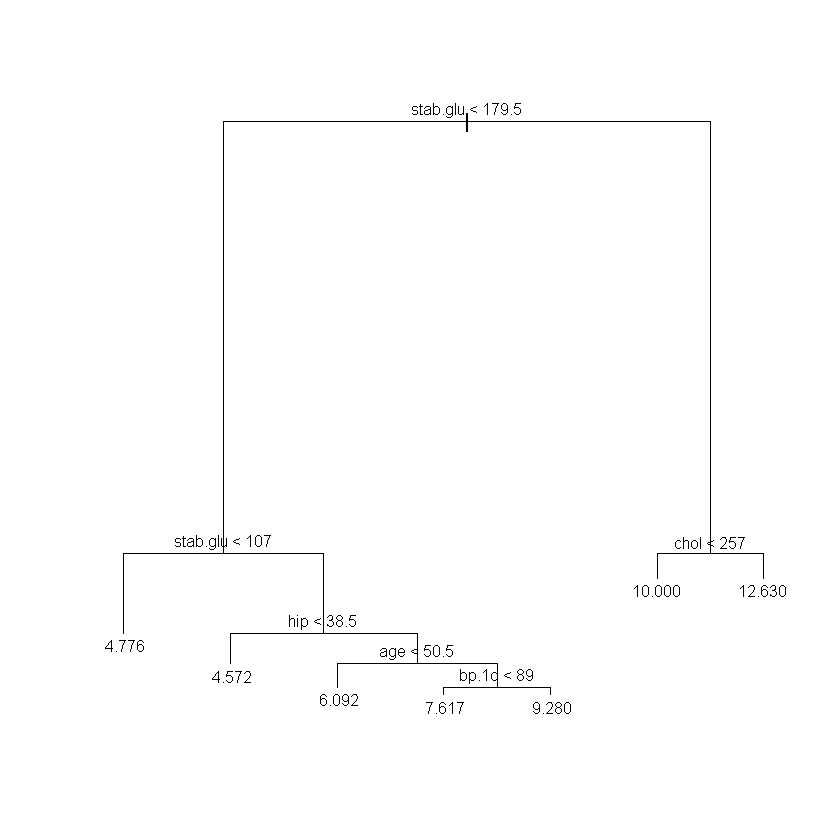

In [117]:
plot(tree(exp(y)~.,data=X))
text(tree(exp(y)~.,data=X), pretty = 3, cex = 0.8)

## Bayesian Regression

In [ ]:
model = stan_model("gpriorLM.stan")

In [ ]:
model

### Model Test

In [ ]:
set.seed(123)  # For reproducibility
N <- 100    # Number of observations
K <- 5      # Number of predzzictors
beta_true <- c(3, -2, 1, 0, 0)  # True coefficients (including zeroes for sparsity)
sigma_true <- 1.5  # True residual standard deviation

X.s <- matrix(rnorm(N * K, mean = 0, sd = 1), nrow = N, ncol = K)

y.s <- X.s %*% beta_true + rnorm(N, mean = 0, sd = sigma_true)

s20 <- mean((y.s - X.s %*% solve(t(X.s) %*% X.s) %*% t(X.s) %*% y.s )^2)
s20

In [ ]:
# mod1_data <- list(
#   X = X.s,
#   K = ncol(X.s),
#   N = nrow(X.s),
#   y = as.vector(y.s),
#   g = nrow(X.s),
#   nu0 = 1,
#   s20 = s20
# )

In [ ]:
mod1_data <- list(
    X = X.s,
    P = ncol(X.s),
    N = nrow(X.s),
    y = as.vector(y.s),
    sigma2 = 1.0,               # Example fixed variance (adjust as needed)
    tau2 = 1.0,                 # Example slab variance (adjust as needed)
    p_prior = 0.5               # Example prior inclusion probability
)

In [ ]:
fit = sampling(model, mod1_data,chains=4)

In [ ]:
beta_true

In [ ]:
posterior_means <- summary(fit)$summary[, "mean"]  
beta_means <- posterior_means[grep("^beta", rownames(summary(fit)$summary))]

comparison <- data.frame(
  True = beta_true,
  Estimated = beta_means
)
print(comparison)

posterior_summary <- summary(fit)$summary
beta_credible <- posterior_summary[grep("^beta", rownames(posterior_summary)), c("2.5%", "97.5%")]

In [ ]:
# Combine for comparison
credible_check <- data.frame(
  True = beta_true,
  lower = beta_credible[, "2.5%"],
  upper = beta_credible[, "97.5%"]
)
credible_check$InInterval <- with(credible_check, True >= lower & True <= upper)
print(credible_check)

In [ ]:
params = extract(fit)

In [ ]:
# mcmc_areas(as.array(fit), pars = c("beta[1]", "beta[2]", "sigma"))
mcmc_areas(as.array(fit), pars = c("beta[1]", "beta[2]"))


In [ ]:
par(mfrow=c(1,4))
ts.plot(params$beta,xlab="Iterations",ylab="beta")
ts.plot(params$sigma,xlab="Iterations",ylab="sigma")

In [ ]:
hist(params$beta,main="",xlab="beta")
hist(params$sigma,main="",xlab="sigma")

In [ ]:

hat_matrix <- posterior_means[grep("^Hg", rownames(summary(fit)$summary))]

hat_matrix <- matrix(hat_matrix, nrow = N, ncol = N)

leverage <- diag(hat_matrix)
hist(leverage, main = "Histogram of Leverage Values", xlab = "Leverage")


### Now with diabetes Data

In [ ]:
X.train <- as.matrix(X.train); y.train <- as.matrix(y.train); X.test <- as.matrix(X.test)
s20 <- mean((y.test - X.test %*% solve(t(X.train) %*% X.train) %*% t(X.train) %*% y.train)^2)
n <- g <- length(y.train); p <- ncol(X.train); nu0 <- 1; S <- 1000

Hg <- g/(g+1) * X.train%*%solve(t(X.train)%*%X.train) %*% t(X.train) 
SSRg <- t(y.train) %*% (diag(1,nrow = n) - Hg) %*% y.train

s2 <- 1/rgamma(S, (nu0+n)/2, (nu0*s20+SSRg)/2)

Vb <- g*solve(t(X.train)%*%X.train)/(g+1)
Eb <- Vb%*%t(X.train)%*%y.train

E <- matrix(rnorm(S*p, 0, sqrt(s2)), S, p)
beta <- t( t(E%*%chol(Vb)) + c(Eb))

In [ ]:
as.data.frame(beta)

In [ ]:
beta.estimates <- as.data.frame(beta) %>%
  summarise(across(
    everything(),
    list(
      mean = mean,
      `2.5%` = ~ quantile(.x, 0.025),
      `97.5%` = ~ quantile(.x, 0.975)
    ),
    .names = "{.col}_{.fn}"
  )) %>%
  pivot_longer(
    cols = everything(),
    names_to = "name",
    values_to = "value"
  ) %>%
  separate(
    col = name,
    into = c("beta", "stat"),
    sep = "_(?=[^_]+$)"
  ) %>%
  pivot_wider(
    names_from = stat,
    values_from = value
  ) %>%
  column_to_rownames(var = "beta")


In [ ]:
beta.estimates

In [ ]:
beta.estimates <- beta.estimates %>%
  rownames_to_column(var = "beta") %>%
  mutate(significant = ifelse(`2.5%` > 0 | `97.5%` < 0, "Significant", "Not Significant"))

In [ ]:
beta.est.plot <- ggplot(beta.estimates, aes(x = beta, y = mean, ymin = `2.5%`, ymax = `97.5%`, color = significant)) +
  geom_pointrange() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(title = "Beta Estimates with Confidence Intervals",
       x = "Beta",
       y = "Estimate") +
  theme_minimal() +
  scale_color_manual(values = c("Significant" = "red", "Not Significant" = "blue")) + coord_flip()
beta.est.plot

In [ ]:
ggsave("betaEstimatesGPrior.png", plot = beta.est.plot)

In [ ]:
B <- as.matrix(beta.estimates$mean, nrow=nrow(beta.estimates), ncol=1)

In [ ]:
y.hat.bayes <- X.test %*% B

In [ ]:
exp(mean((y.hat.bayes - y.test)^2))

## Model Selection

In [ ]:
# tau2 <- as.numeric(var(y.train) / mean(apply(X.train, 2, var)))
# as.numeric(tau2)

In [ ]:
# data_list <- list(
#   N = nrow(X.train),               # Number of observations
#   P = ncol(X.train),                 # Number of predictors
#   X = X.train, # Random design matrix (replace with your data)
#   y = as.vector(y.train),        # Response variable (replace with your data)
#   sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
#   tau2 = tau2,              # Variance of slab for coefficients
#   p_prior = 0.5          # Prior inclusion probability
# )

In [ ]:
#fit <- stan(file = "gpriorLM.stan", data = data_list, seed = 42, chains = 4)

In [ ]:
# ## GG

# # Initialize variables
# included_vars <- rep(0, ncol(X.train))  # Start with all variables excluded
# current_vars <- included_vars
# #current_vars[1] <- 0  # Always include the intercept
# variable_names <- colnames(X.train)

# # Stan model file
# stan_file <- "gpriorLM.stan"  # Ensure the Stan file matches the earlier specification

# # # Bayesian Model Selection Loop
# # for (i in 1:ncol(X.train)) {
# #   # Update the data list for Stan
# #   data_list <- list(
# #   N = nrow(X.train),               # Number of observations
# #   P = ncol(X.train),                 # Number of predictors
# #   X = X.train, # Random design matrix (replace with your data)
# #   y = as.vector(y.train),        # Response variable (replace with your data)
# #   sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
# #   tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))), # Variance of slab for coefficients
# #   p_prior = 0.5          # Prior inclusion probability
# # )
  
# #   # Fit the model
# #   fit <- stan(file = stan_file, data = data_list, seed = 42, chains = 4, iter = 2000)
# #   # Extract inclusion probabilities
# #   fit_summary <- summary(fit, pars = "inclusion_probs")$summary
# #   inclusion_probs <- fit_summary[, "mean"]
  
# #   inclusion_probs[current_vars == 1] <- -Inf # Set inclusion probabilities of already-included variables to -Inf (prevent premature break)
  
# #   # Find the variable with the highest posterior inclusion probability
# #   new_var <- which.max(inclusion_probs)
# #   if (current_vars[new_var] == 1) break  # If no new variable, stop the loop
  
# #   # Include the selected variable
# #   current_vars[new_var] <- 1
# #   cat("Adding variable:", variable_names[new_var], "\n")
# # }

In [ ]:
# # [[ ADJUST TO ENSURE ONLY SELECTED VARIABLES UESED IN TRAININ ]]

# ## GG

# # Initialize variables
# included_vars <- rep(0, ncol(X.train))  # Start with all variables excluded
# current_vars <- included_vars
# current_vars[1] <- 0  # Always include the intercept
# variable_names <- colnames(X.train) # [[ ADJUST TO ENSURE ONLY SELECTED VARIABLES UESED IN TRAININ ]]
# stan_file <- "gpriorLM.stan"  # Ensure the Stan file matches the earlier specification

# # Update the data list for Stan
# data_list <- list(
# N = nrow(X.train),               # Number of observations
# P = ncol(X.train),                 # Number of predictors
# X = X.train, # Random design matrix (replace with your data)
# y = as.vector(y.train),        # Response variable (replace with your data)
# sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
# tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))), # Variance of slab for coefficients
# p_prior = 0.5          # Prior inclusion probability
# )

# # Fit the model
# fit <- stan(file = stan_file, data = data_list, seed = 42, chains = 4, iter = 2000)
# fit_summary <- summary(fit, pars = "inclusion_probs")$summary
# inclusion_probs <- fit_summary[, "mean"]

# # Include the selected variable
# cat("Adding variable:", variable_names[new_var], "\n")

In [ ]:
# fit_summary

## EXPERIMENT DUPE BLOCK

In [ ]:
# ## EXPERIMENT -- CONDITION ON RELATIVE FIT

# stan_file <- "gpriorLM.stan"  # Ensure the Stan file matches the earlier specification

# included_vars <- rep(0, ncol(X.train))  # Start with all variables excluded
# included_vars[1] <- 1  # Always include the intercept
# current_vars <- included_vars
# variable_names <- colnames(X.train)

# current_fit <- NULL
# current_log_lik <- -Inf  # Initialize with a very low likelihood

# # Bayesian Model Selection Loop
# for (i in 1:ncol(X.train)) {
#   data_list <- list(
#     N = nrow(X.train),               # Number of observations
#     P = sum(current_vars),           # Number of included predictors
#     X = X.train[, which(current_vars == 1), drop = FALSE],  # Current predictors
#     y = as.vector(y.train),          # Response variable
#     sigma2 = as.numeric(var(y.train)),  # Fixed variance for likelihood
#     tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))), # Variance of slab
#     p_prior = 0.5                    # Prior inclusion probability
#   )
  
#   current_fit <- stan(file = stan_file, data = data_list, seed = 42, chains = 4, iter = 2000)  
#   current_log_lik <- sum(rstan::extract(current_fit, pars = "log_lik")$log_lik)
  
#   # Test adding each remaining variable
#   for (new_var in which(current_vars == 0)) {
#     test_vars <- current_vars
#     test_vars[new_var] <- 1  # Add the new variable
    
#     test_data_list <- list(
#       N = nrow(X.train),
#       P = sum(test_vars),
#       X = X.train[, which(test_vars == 1), drop = FALSE],
#       y = as.vector(y.train),
#       sigma2 = as.numeric(var(y.train)),
#       tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))),
#       p_prior = 0.5
#     )
    
#     test_fit <- stan(file = stan_file, data = test_data_list, seed = 42, chains = 4, iter = 2000)
#     test_log_lik <- sum(rstan::extract(test_fit, pars = "log_lik")$log_lik)
    
#     # Compare models using log-likelihood
#     if (test_log_lik > current_log_lik) {
#       # Update the current model if the test model is better
#       current_vars <- test_vars
#       current_fit <- test_fit
#       current_log_lik <- test_log_lik
#       cat("Adding variable:", variable_names[new_var], "\n")
#       break  # Exit the loop once a better variable is found
#     }
#   }
# }

# # Final Model
# final_data_list <- list(
#   N = nrow(X.train),
#   P = sum(current_vars),
#   X = X.train[, which(current_vars == 1), drop = FALSE],
#   y = y.train,
#   sigma2 = as.numeric(var(y.train)),
#   tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))),
#   p_prior = 0.5
# )

# final_model <- stan(file = stan_file, data = final_data_list, seed = 42, chains = 4, iter = 4000)

# # Print inclusion probabilities and model summary
# fit_params <- rstan::extract(final_model, pars = "inclusion_probs")
# inclusion_probs_mean <- colMeans(fit_params$inclusion_probs)

# inclusion_data <- data.frame(
#   Variable = variable_names,
#   Inclusion_Probability = inclusion_probs_mean
# )

# # Print final results
# print(inclusion_data)


In [ ]:
# ## EXPERIMENT -- SPIKE AND SLAB PRIORS

# # Initialize variables
# included_vars <- rep(0, ncol(X.train))  # Start with all variables excluded
# current_vars <- included_vars
# #current_vars[1] <- 0  # Always include the intercept
# variable_names <- colnames(X.train)

# # Stan model file
# stan_file <- "gpriorLM.stan"  # Ensure the Stan file matches the earlier specification

# # Bayesian Model Selection Loop
# for (i in 1:ncol(X.train)) {
#   # Update the data list for Stan
#   data_list <- list(
#   N = nrow(X.train),               # Number of observations
#   P = ncol(X.train),                 # Number of predictors
#   X = X.train, # Random design matrix (replace with your data)
#   y = as.vector(y.train),        # Response variable (replace with your data)
#   sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
#   tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))), # Variance of slab for coefficients
#   p_prior = 0.5          # Prior inclusion probability
# )
  
#   # Fit the model
#   fit <- stan(file = stan_file, data = data_list, seed = 42, chains = 4, iter = 2000)
#   # Extract inclusion probabilities
#   fit_summary <- summary(fit, pars = "inclusion_probs")$summary
#   inclusion_probs <- fit_summary[, "mean"]
  
#   inclusion_probs[current_vars == 1] <- -Inf # Set inclusion probabilities of already-included variables to -Inf (prevent premature break)
  
#   # Find the variable with the highest posterior inclusion probability
#   new_var <- which.max(inclusion_probs)
#   if (current_vars[new_var] == 1) break  # If no new variable, stop the loop
  
#   # Include the selected variable
#   current_vars[new_var] <- 1
#   cat("Adding variable:", variable_names[new_var], "\n")
# }


In [ ]:
# current_fit

In [ ]:
# # Final Model
# final_data_list <- list(
#   N = nrow(X.train),
#   P = sum(current_vars),
#   X = X.train[, which(current_vars == 1), drop = FALSE],
#   y = as.vector(y.train),
#   sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
#   tau2 = as.numeric(var(y.train) / mean(apply(X.train, 2, var))), # Variance of slab for coefficients
#   p_prior = 0.5          # Prior inclusion probability
# )
# final_model <- stan(file = stan_file, data = final_data_list, seed = 42, chains = 4, iter = 4000)

In [ ]:
# fit_summary <- summary(fit, pars = "inclusion_probs")$summary
# fit_summary <- summary(fit)$summary
# fit_summary

# #y_pred <- as.matrix(final_model, pars = "beta")  # Replace "y_pred" with appropriate Stan output
# #y_pred

# #y_pred <- as.matrix(final_model, pars = "y_pred")  # Replace "y_pred" with appropriate Stan output
# #y_pred

In [ ]:
# # Posterior predictive checks
# y_pred <- as.matrix(final_model, pars = "y_pred")  # Replace "y_pred" with appropriate Stan output
# posterior_mean <- colMeans(y_pred)
# posterior_sd <- apply(y_pred, 2, sd)

# # Model evaluation
# cat("Posterior predictive mean:", mean(posterior_mean), "\n") # TBU
# cat("Posterior predictive SD:", mean(posterior_sd), "\n") # TBU

# # Save results
# #saveRDS(final_model, file = "final_model.rds")

In [ ]:
# var_data <- data.frame(
#   Variable = colnames(X.train[, which(current_vars == 1), drop = FALSE]),
#   Inclusion_Probs = summary(fit, pars = "inclusion_probs")$summary[, "mean"],
#   Beta = summary(fit, pars = "beta")$summary[, "mean"]
# )

# print(var_data)


## Code Per Class

In [ ]:
# data_list <- list(
#   N = nrow(X.train),               # Number of observations
#   P = ncol(X.train),                 # Number of predictors
#   X = X.train, # Random design matrix (replace with your data)
#   y = as.vector(y.train),        # Response variable (replace with your data)
#   sigma2 = as.numeric(var(y.train)),            # Fixed variance for likelihood
#   tau2 = tau2,              # Variance of slab for coefficients
#   p_prior = 0.5          # Prior inclusion probability
# )a

In [89]:
#### R code for lecture 6

## [DEF Y AND X]

## prior specification (slides 30-32)
g <- 12; a <- 0.5; b <- 4.27; n <- length(y); S <- 5000; # NEED TO ADJUST?
beta_sam <- matrix(0, nrow = S, ncol = 4)

## sample sigma^2
a_tilde <- a + n / 2
b_tilde <- b + sum(y ^ 2) / 2 - g / (2 * (g + 1)) * 
  t(y) %*% X %*% solve(t(X) %*% X) %*% t(X) %*% y
sigma2_sam <- 1 / rgamma(S, a_tilde, b_tilde)

## sample beta
Sig <- g / (g + 1) * solve(t(X) %*% X)
beta_n <- Sig %*% t(X) %*% y
for(i in 1 : S){
  beta_sam[i, ] <- rmvnorm(1, beta_n, Sig * sigma2_sam[i])
}

## 95% credible interval for beta_2
quantile(beta_sam[, 2], c(0.025, 0.975))
## 95% credible interval for beta_4
quantile(beta_sam[, 4], c(0.025, 0.975)) ### Use 'apply' function to find credible intervals for all betas

###################################################################################

### 442 diabetes patients example

## [[ ADJUST TO USE DIABETES DATA ]]

# yf <- diabetes$y; Xf <- diabetes$X  ## the data with 64 variables

## set up training and test data
n <- length(yf)
i.te <- sample(1 : n, 100)
i.tr <- (1 : n)[-i.te]
#y <- yf[i.tr]; X <- Xf[i.tr, ] ## training data
#y.te <- yf[i.te]; X.te <- Xf[i.te, ] ## test data

# # ## compute OLS and make prediction
# # olsfit <- lm(y ~ -1 + X) ## fit linear model
# # olsfit$coef ## OLS estimate
# # y.te.ols <- X.te %*% olsfit$coef ## prediction for test data
# # mean((y.te - y.te.ols) ^ 2) ## mean squared predictive error

# # ## make plots on slide 39
# # par(mfrow = c(1, 2), mar = c(2.75, 2.75, 1.5, 1.5), mgp = c(1.5, .5, 0))
# # plot(y.te, y.te.ols, xlab = expression(italic(y)[test]),
# #      ylab = expression(hat(italic(y))[test]))
# # abline(0, 1)
# # plot(olsfit$coef, type = "h", lwd = 2, xlab = "predictor index",
# #      ylab = expression(hat(beta)[ols]))


# ############################### Apply backward elimination to diabetes example

# ## load R code for backward elimination
# source("backselect.R")

# ## recall that y, X is the training data
# ## choose the cutoff to be 1.65
# vars <- bselect.tcrit(y, X, tcrit = 1.65) 

# ## fit reduced model
# bslfit <- lm(y ~ -1 + X[, vars$remain])

# ## compute the prediction based on reduced model
# y.te.bsl <- X.te[ ,vars$remain] %*% bslfit$coef


########################################################################

## Bayesian model selection with invariant g-prior (slide 50 - 58)

## only show how to calculate for z=(1,1,1,1)

# ## data for oxygen intake example:
# y <- c(-0.87, -10.74, -3.27, -1.97, 7.50, -7.25,
#        17.05, 4.96, 10.40, 11.05, 0.26, 2.51)
# x2 <- c(0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
# x3 <- c(23, 22, 22, 25, 27, 20, 31, 23, 27, 28, 22, 24)
# X <- cbind(rep(1, 12), x2, x3, x2 * x3) ## include all four variables

# ## set parameter values in the prior
# n <- length(y); g <- n; az <- 0.5; 
# MSEz <- sum((y - X %*% solve(t(X) %*% X) %*% t(X) %*% y) ^ 2) / (n - ncol(X)) ## MSE
# bz <- 0.5 * MSEz

# ## calculate the marginal density from the formula
# SSRz <- sum(y ^ 2) - g / (g + 1) * t(y) %*% X %*% solve(t(X) %*% X) %*% t(X) %*% y
# log(pi ^ {-n/2} * gamma(az + n/2) / gamma(az) * (2 * bz) ^ az * 
#       (1 + g) ^ {-ncol(X)/2} / (2 * bz + SSRz) ^ {az + n/2})


###### Bayesian model selection Gibbs sampling

## load R code for computing the log of p(y|X,z)
## the function lpy.X computes log of p(y|X, z) under g-prior
# source("regression_gprior.R")

# S <- 10000
# Z <- matrix(NA, S, dim(X)[2]) ## store the MCMC samples

# ## starting value
# z <- rep(1, dim(X)[2])  

# ## the initial log of p(y|X,z); the prior parameter values that we 
# ## specified are the default values in this function
# lpy.c <- lpy.X(y, X[, z == 1, drop = FALSE])

# for(s in 1 : S){
  
#   ## update each coordinate of z
#   for(j in sample(1 : dim(X)[2])){
    
#     zp <- z; zp[j] <- 1 - zp[j];
#     lpy.p <- lpy.X(y, X[, zp == 1, drop = FALSE])
#     r <- (lpy.p - lpy.c) * (-1) ^ (zp[j] == 0)
#     z[j] <- rbinom(1, 1, 1 / (1 + exp(-r))) ## sampling from bernoulli 
#     if(z[j] == zp[j]) {lpy.c <- lpy.p}
#   }
  
#   Z[s, ] <- z
# }

ERROR: Error in t(y) %*% X: requires numeric/complex matrix/vector arguments


In [ ]:
# # DELETE # #

# X.train <- as.matrix(X.train); y.train <- as.matrix(y.train); X.test <- as.matrix(X.test)
# s20 <- mean((y.test - X.test %*% solve(t(X.train) %*% X.train) %*% t(X.train) %*% y.train)^2)
# n <- g <- length(y.train); p <- ncol(X.train); nu0 <- 1; S <- 1000

# Hg <- g/(g+1) * X.train%*%solve(t(X.train)%*%X.train) %*% t(X.train) 
# SSRg <- t(y.train) %*% (diag(1,nrow = n) - Hg) %*% y.train

# s2 <- 1/rgamma(S, (nu0+n)/2, (nu0*s20+SSRg)/2)

# Vb <- g*solve(t(X.train)%*%X.train)/(g+1)
# Eb <- Vb%*%t(X.train)%*%y.train

# E <- matrix(rnorm(S*p, 0, sqrt(s2)), S, p)
# beta <- t( t(E%*%chol(Vb)) + c(Eb))

In [119]:
# RELEVANT PIECE
X.train <- as.matrix(X.train)

###### Bayesian model averaging (slide 60 -62)
## the sampling part for z is the same as before
source("regression_gprior.R")
S <- 10000
BETA <- Z <- matrix(NA, S, dim(.train)[2]) ## store the MCMC samples
z <- rep(1, dim(X.train)[2])  
lpy.c <- lpy.X(y.train, X.train[, z == 1, drop = FALSE])

print("Entering loop")
for(s in 1 : S){
    if (s %% 100 == 0) {
        print(cat("Iteration:", s, "\n"))
    }
  for(j in sample(1 : dim(X.train)[2])){
    zp <- z; zp[j] <- 1 - zp[j];
    lpy.p <- lpy.X(y.train, X.train[, zp == 1, drop = FALSE])
    r <- (lpy.p - lpy.c) * (-1) ^ (zp[j] == 0)
    z[j] <- rbinom(1, 1, 1 / (1 + exp(-r)))  
    if(z[j] == zp[j]) {lpy.c <- lpy.p}
  }
  beta <- z
  
  ## the function lm.gprior generates samples for beta and sigma^2
  if(sum(z) > 0) {beta[z == 1] <- lm.gprior(y.train, X.train[, z == 1, drop = FALSE], S = 1)$beta}
  
  Z[s, ] <- z
  BETA[s, ] <- beta
}

[1] "Entering loop"
Iteration: 100 
NULL
Iteration: 200 
NULL
Iteration: 300 
NULL
Iteration: 400 
NULL
Iteration: 500 
NULL
Iteration: 600 
NULL
Iteration: 700 
NULL
Iteration: 800 
NULL
Iteration: 900 
NULL
Iteration: 1000 
NULL
Iteration: 1100 
NULL
Iteration: 1200 
NULL
Iteration: 1300 
NULL
Iteration: 1400 
NULL
Iteration: 1500 
NULL
Iteration: 1600 
NULL
Iteration: 1700 
NULL
Iteration: 1800 
NULL
Iteration: 1900 
NULL
Iteration: 2000 
NULL
Iteration: 2100 
NULL
Iteration: 2200 
NULL
Iteration: 2300 
NULL
Iteration: 2400 
NULL
Iteration: 2500 
NULL
Iteration: 2600 
NULL
Iteration: 2700 
NULL
Iteration: 2800 
NULL
Iteration: 2900 
NULL
Iteration: 3000 
NULL
Iteration: 3100 
NULL
Iteration: 3200 
NULL
Iteration: 3300 
NULL
Iteration: 3400 
NULL
Iteration: 3500 
NULL
Iteration: 3600 
NULL
Iteration: 3700 
NULL
Iteration: 3800 
NULL
Iteration: 3900 
NULL
Iteration: 4000 
NULL
Iteration: 4100 
NULL
Iteration: 4200 
NULL
Iteration: 4300 
NULL
Iteration: 4400 
NULL
Iteration: 4500 
NULL

In [135]:
as.matrix(apply(BETA, MARGIN = 2, FUN=mean))
as.matrix(colnames(X))

ERROR: Error in data.frame(as.matrix(apply(BETA, MARGIN = 2, FUN = mean)), as.matrix(colnames(X))): arguments imply differing number of rows: 18, 17
